In [54]:
import pandas
import matplotlib.pyplot as plt
import random
import math
import numpy as np
from numpy.linalg import norm
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import quad
from scipy.optimize import minimize_scalar
from scipy.stats import norm
import seaborn as sns

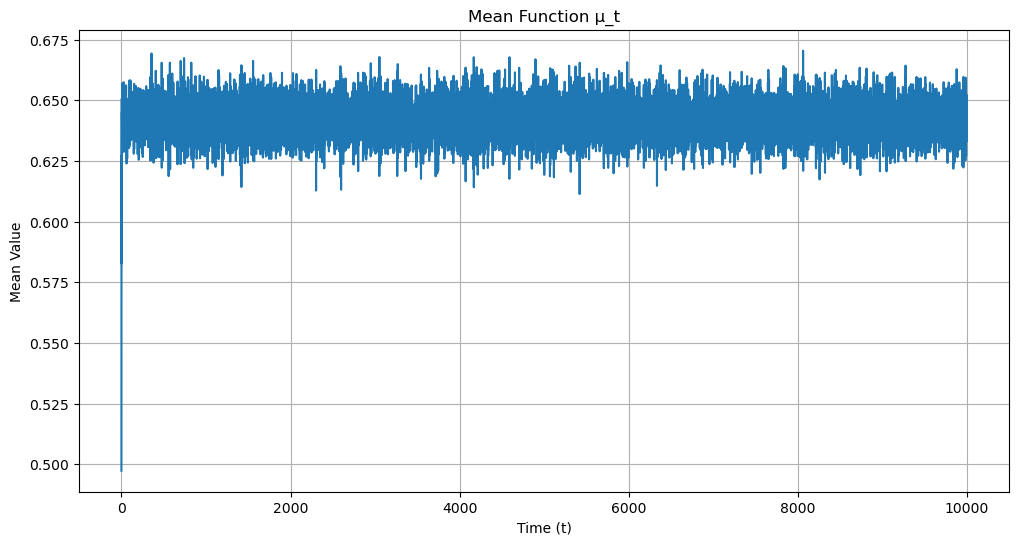

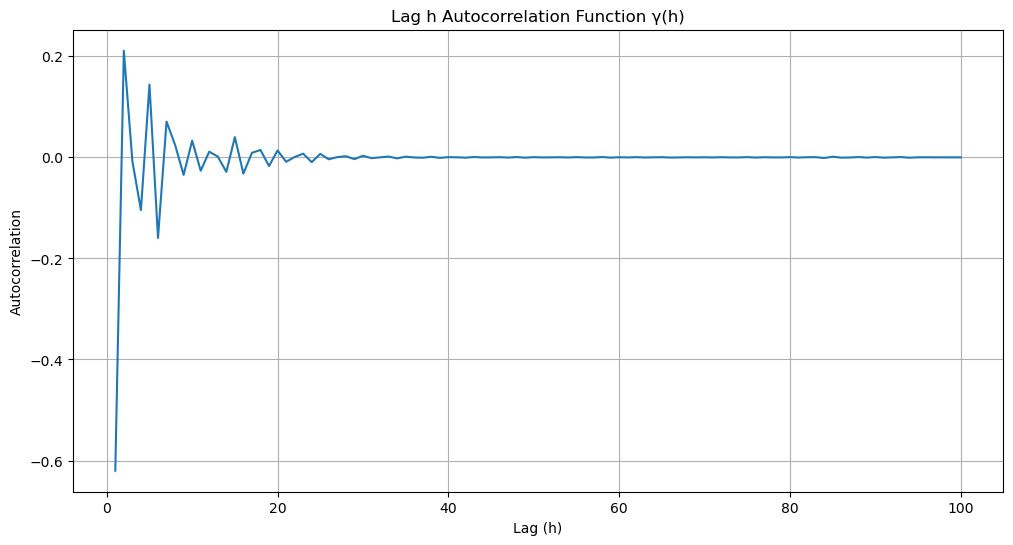

The time series is stationary: True


In [63]:
#Question 1

r = 3.8
m = 1000
n = 10000

ensemble = np.zeros((m, n))

for i in range(m):
    x = np.random.uniform(0, 1)
    for j in range(n):
        ensemble[i, j] = x
        x = r * x * (1 - x)

mean_function = np.zeros(n)
for j in range(n):
    mean_function[j] = sum(ensemble[:, j]) / m

plt.figure(figsize=(12, 6))
plt.plot(mean_function)
plt.title("Mean Function µ_t")
plt.xlabel("Time (t)")
plt.ylabel("Mean Value")
plt.grid(True)
plt.show()

def autocorrelation(x, h):
    return np.corrcoef(x[:-h], x[h:])[0, 1]

lags = np.arange(1, 101)
autocorrs = np.zeros((m, len(lags)))

for i in range(m):
    for j, h in enumerate(lags):
        autocorrs[i, j] = autocorrelation(ensemble[i], h)

mean_autocorr = np.zeros(len(lags))
for j in range(len(lags)):
    mean_autocorr[j] = sum(autocorrs[:, j]) / m

plt.figure(figsize=(12, 6))
plt.plot(lags, mean_autocorr)
plt.title("Lag h Autocorrelation Function γ(h)")
plt.xlabel("Lag (h)")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

is_stationary = np.all(np.abs(mean_autocorr) < 1)
print(f"The time series is stationary: {is_stationary}")

Regression Coefficients: [-34.8827613    0.29556523   0.98756323  -0.30726574]


C:\Users\tiger\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


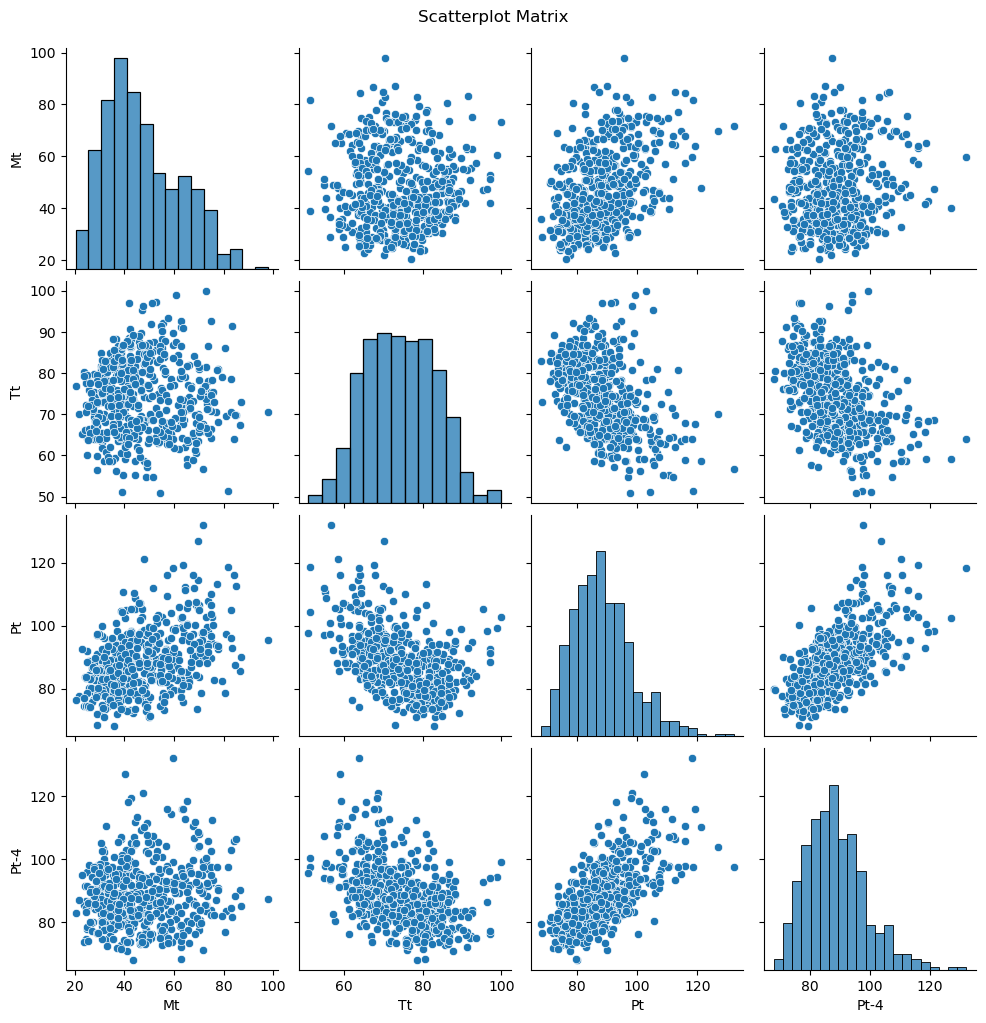

            Mt        Tt        Pt      Pt-4
Mt    1.000000 -0.014824  0.442290  0.139758
Tt   -0.014824  1.000000 -0.436965 -0.461234
Pt    0.442290 -0.436965  1.000000  0.650995
Pt-4  0.139758 -0.461234  0.650995  1.000000
Correlation between Mt and Pt: 0.4422895801139043
Correlation between Mt and Pt-4: 0.13975806387630263


In [57]:
#Question 2
#The regression equation is the same but with Beta3*P(t-4) added 



Mt = np.loadtxt("part_table.txt")
Tt = np.loadtxt("tempr_table.txt")
Pt = np.loadtxt("cmort_table.txt")

Mt = np.delete(Mt, [0], 1)
Tt = np.delete(Tt, [0], 1)
Pt = np.delete(Pt, [0], 1)
Mt = np.delete(Mt, [0], 1)
Tt = np.delete(Tt, [0], 1)
Pt = np.delete(Pt, [0], 1)

m = []
for val in Mt:
    m.append(val[0])
Mt = np.array(m)
t = []
for val in Tt:
    t.append(val[0])
Tt = np.array(t)
p = []
for val in Pt:
    p.append(val[0])
Pt = np.array(p)

Pt_4 = np.roll(Pt, 4)


# Drop the first 4 points to take care of the edge effect
Mt = Mt[4:]
Tt = Tt[4:]
Pt = Pt[4:]
Pt_4 = Pt_4[4:]

X = np.column_stack((np.ones(len(Mt)), Tt, Pt, Pt_4))
y = Mt


# Solving the normal equations
beta, _, _, _ = np.linalg.lstsq(X, y, rcond=None)

print(f"Regression Coefficients: {beta}")

df = pd.DataFrame({
    'Mt': y,
    'Tt': X[:, 1],
    'Pt': X[:, 2],
    'Pt-4': X[:, 3]
})

sns.pairplot(df)
plt.suptitle("Scatterplot Matrix", y=1.02)
plt.show()

# correlations
correlations = df.corr()
print(correlations)

# Comparing the relationship between Mt and Pt versus Mt and Pt-4
print(f"Correlation between Mt and Pt: {correlations.loc['Mt', 'Pt']}")
print(f"Correlation between Mt and Pt-4: {correlations.loc['Mt', 'Pt-4']}")

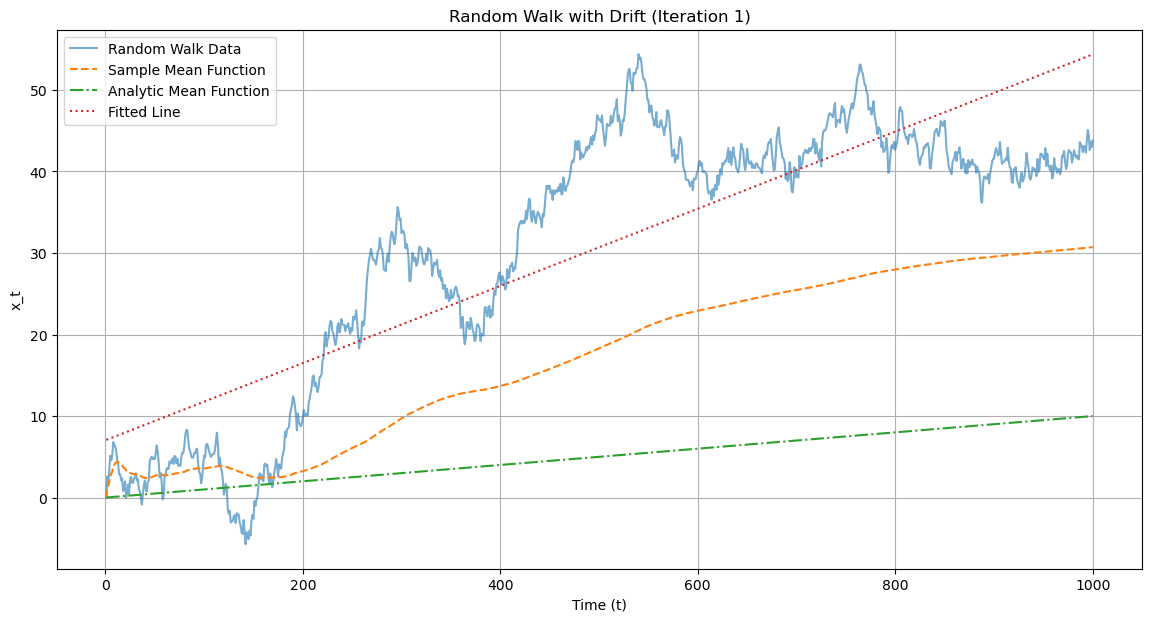

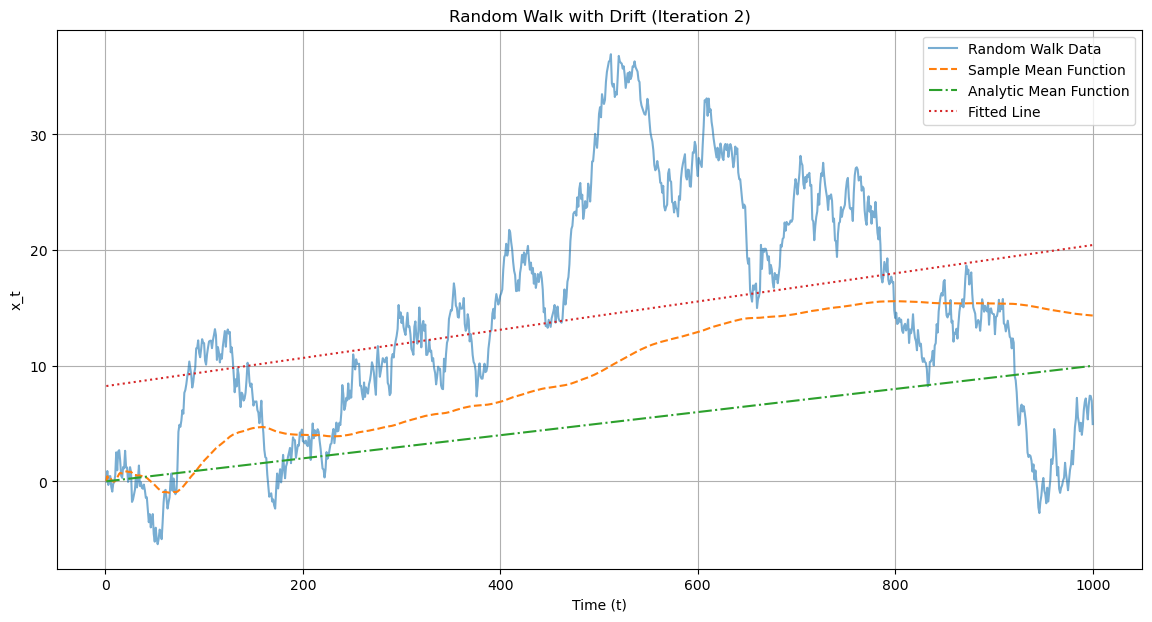

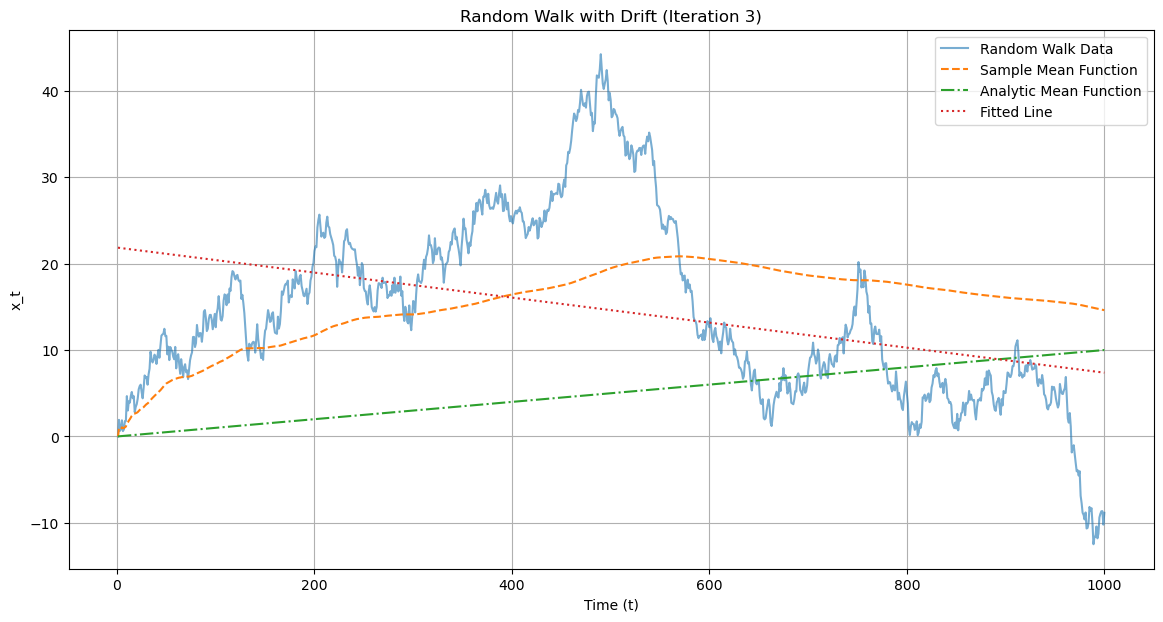

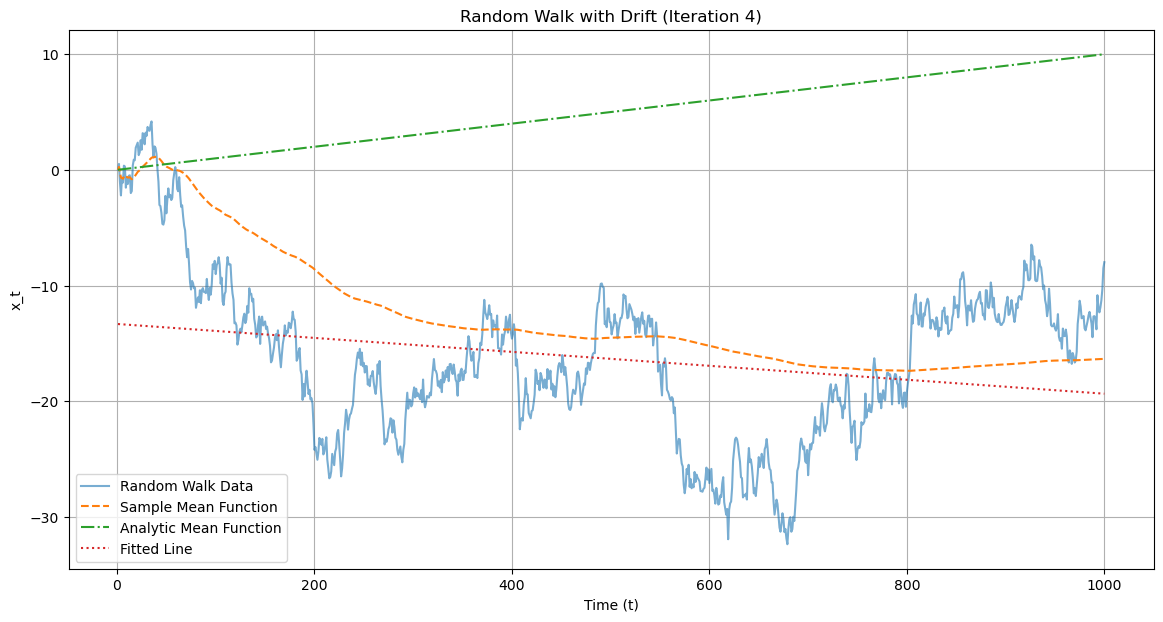

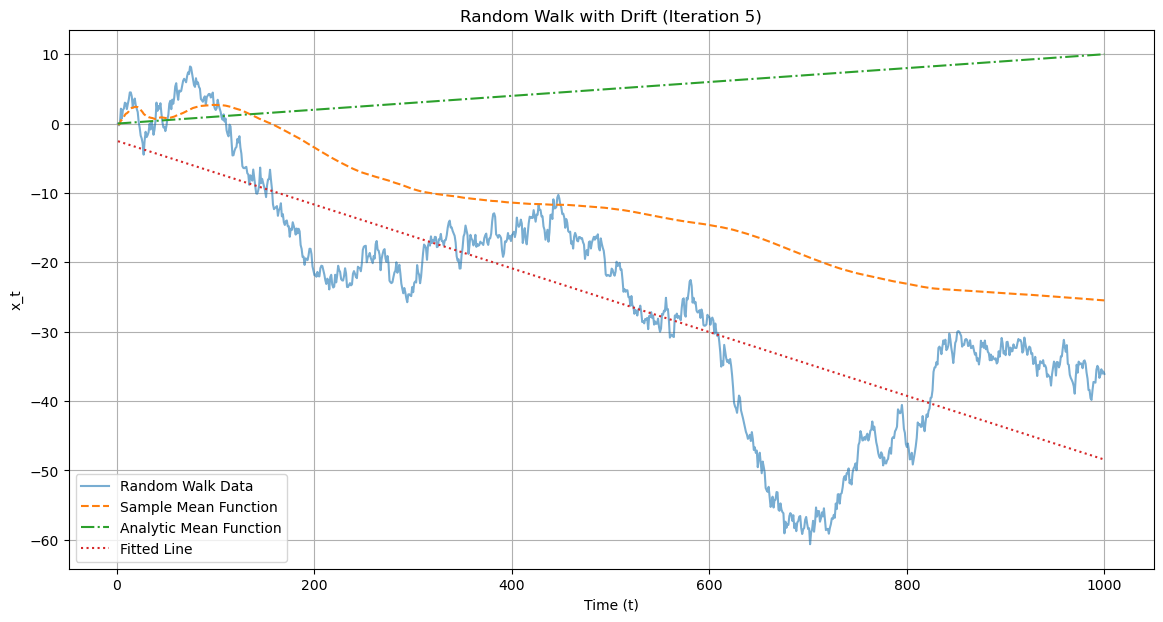

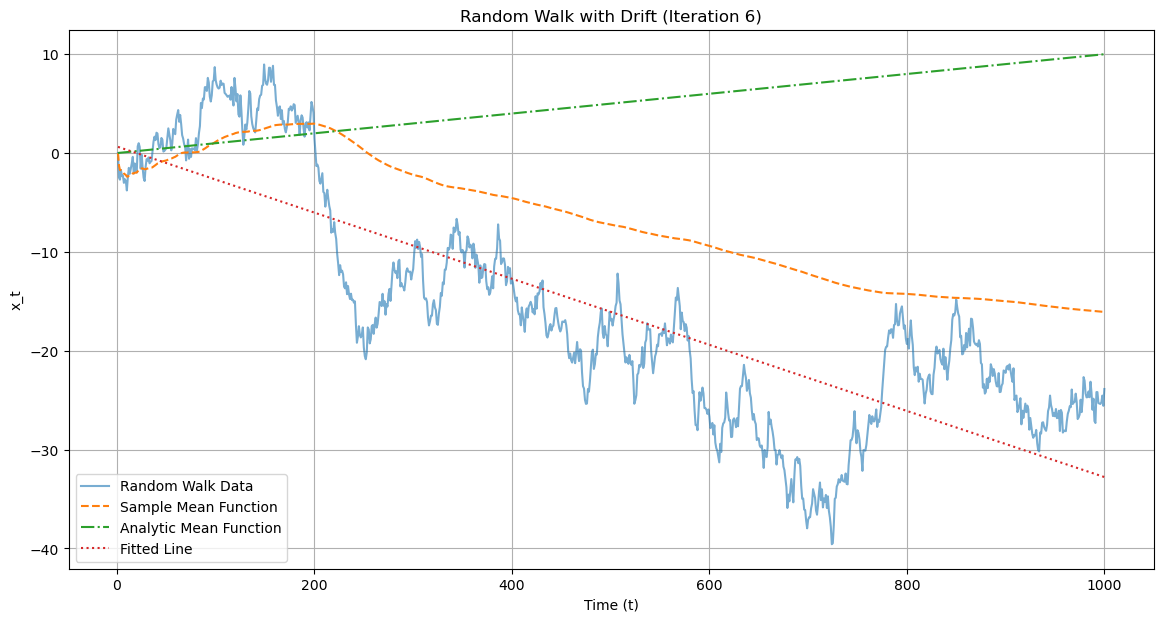

In [13]:
#Question 3
n = 1000
delta = 0.01
sigma_w = 1
iterations = 6

def generate_random_walk(n, delta, sigma_w):
    w = np.random.normal(0, sigma_w, n)
    x = np.zeros(n)
    for t in range(1, n):
        x[t] = x[t-1] + delta + w[t]
    return x

def fit_regression(x):
    t = np.arange(1, len(x) + 1).reshape(-1, 1)
    model = LinearRegression()
    model.fit(t, x)
    return model

def plot_results(x, sample_mean, analytic_mean, fitted_line, iteration):
    t = np.arange(1, len(x) + 1)
    plt.figure(figsize=(14, 7))
    plt.plot(t, x, label='Random Walk Data', alpha=0.6)
    plt.plot(t, sample_mean, label='Sample Mean Function', linestyle='--')
    plt.plot(t, analytic_mean, label='Analytic Mean Function', linestyle='-.')
    plt.plot(t, fitted_line, label='Fitted Line', linestyle=':')
    plt.title(f'Random Walk with Drift (Iteration {iteration + 1})')
    plt.xlabel('Time (t)')
    plt.ylabel('x_t')
    plt.legend()
    plt.grid(True)
    plt.show()

for i in range(iterations):
    x = generate_random_walk(n, delta, sigma_w)
    
    sample_mean = np.cumsum(x) / np.arange(1, n + 1)
    
    analytic_mean = delta * np.arange(1, n + 1)
    
    model = fit_regression(x)
    fitted_line = model.predict(np.arange(1, n + 1).reshape(-1, 1))
    
    plot_results(x, sample_mean, analytic_mean, fitted_line, i)

In [ ]:
#Question 3 continued
#Sample mean is more variable than the analytic mean and regression, but stabilizes as time goes on
#the regression line fits the trend the best

In [37]:
#Question 4
#a.) F(x) = the integral from negative infinity to x of f(x)
#f(x) = 0 if x <0 and e^(-x) if x >= 0, so for each part we can split the bounds
#So, F(x) is 0 if x <0 and 1-e^(-x) if x >= 0
#b.) E[X] is given by the integral of -inf to inf of x*f(x)
#E[X] will just be the integral from 0 to inf of x*e^(-x)
#So, E[X] = 1

In [27]:
#Question 5
#P(X<Y) is given by the double integral of 2e^(−(x+2y))dxdy
#with the bounds on x being 0 to y (x < y)
#and the bounds on y being simply 0 to infinity. 
#This integral evaluates to (1/3)

In [35]:
#Question 6
#The Covariance is E[XY] - E[X]E[Y]
# The marginals PDFs for f(x, y) = (9/10)xy^2 +1/5 are
# fX(x) = the integral from 0 to 1 of f(x,y)dy.
# So, fX(x) = (3/10)x + (1/5) with 0 < x < 2, 0 < y < 1
#Similarly, fY(y) is the integral from 0 to 2 of f(x,y)dx
#So, fY(y) = (9/5)y^2 + (2/5)
#E[X] is the integral from 0 to 2 of x*fX(x)dx
#E[Y] is the integral from 0 to 1 of y*fY(y)dy
#E[XY] is the integral of x*y*f(x,y)dxdy with bounds of 0 < x < 2, 0 < y < 1
#E[X] evaluates to 1
#E[Y] evaluates to 13/20
#E{XY] evaluates to 1
#So, Cov(X,Y) = 7/20

In [ ]:
#Question 7 a-c

#a.) f(θ,ϕ)= (1/4π)sinθ where where θ ∈ [0, π] is the polar angle and φ ∈ [0, 2π] is the azimuthal angle
# f ϕ(ϕ)= the intrgral of (1/4π)sinθdθ from 0 to π.
#f ϕ(ϕ) = 1/(2π)
#fθ(θ)= the integral of (1/4π)sinθdϕ from 0 to 2π
#fθ(θ) = (1/2)sinθ

#b.) Fϕ(ϕ) is the integral of fϕ(ϕ)dϕ from 0 to ϕ
#Fϕ(ϕ) = (1/2π)ϕ
#Fθ(θ) is the integral of fθ(θ)dθ from 0 to θ 
#Fθ(θ)  = (1/2) - (1/2)cosθ

#c.) if U is a random uniform number from 0-1, using the inverse transform method we just invert the CDFs
# ϕ = 2πU and θ = arccos(1-2U)

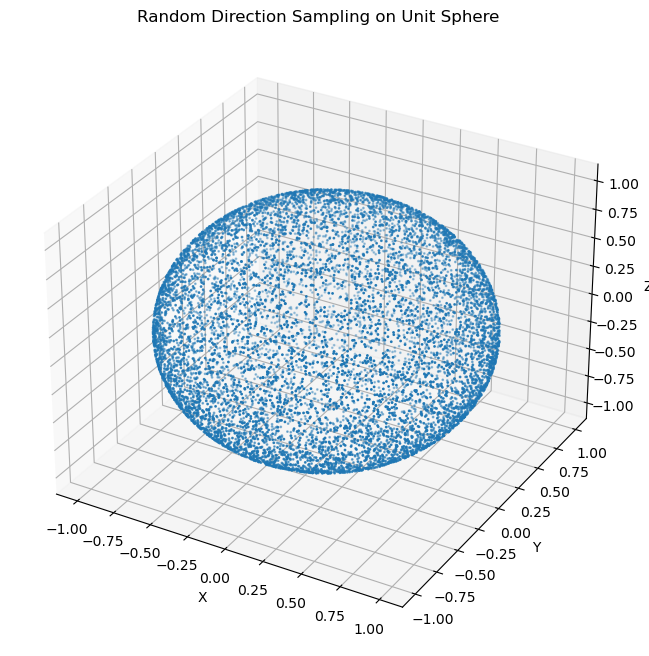

In [16]:
#Question 7d
n_samples = 10000

U = np.random.uniform(0, 1, n_samples)
phi = 2 * np.pi * U

V = np.random.uniform(0, 1, n_samples)
theta = np.arccos(1 - 2 * V)

vx = np.sin(theta) * np.cos(phi)
vy = np.sin(theta) * np.sin(phi)
vz = np.cos(theta)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vx, vy, vz, s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Random Direction Sampling on Unit Sphere')
plt.show()

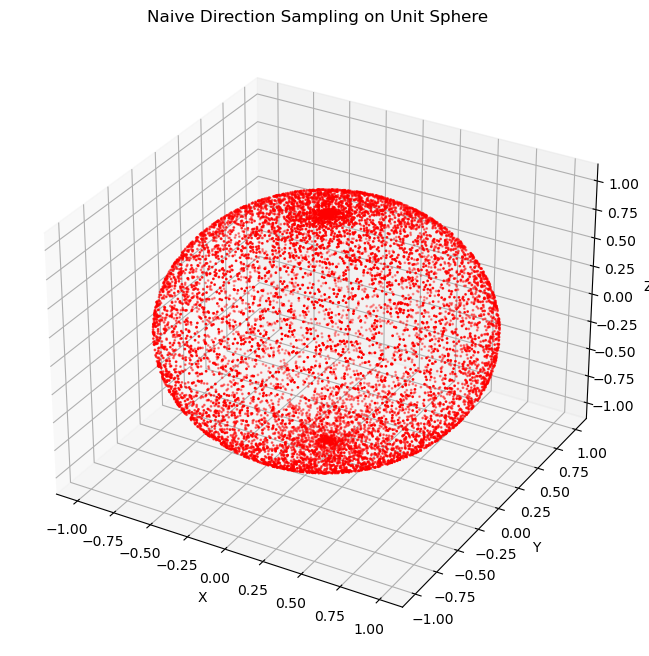

In [18]:
#Question 7e
theta_naive = np.random.uniform(0, np.pi, n_samples)
phi_naive = np.random.uniform(0, 2 * np.pi, n_samples)

vx_naive = np.sin(theta_naive) * np.cos(phi_naive)
vy_naive = np.sin(theta_naive) * np.sin(phi_naive)
vz_naive = np.cos(theta_naive)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vx_naive, vy_naive, vz_naive, s=1, color='red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Naive Direction Sampling on Unit Sphere')
plt.show()

In [59]:
#Question 7 continued

#as you can see the naive distribution is clearly biased to the top and bottom of the sphere

In [ ]:
#Question 8 a.)
#For each card, the probability for a hit is 1/50, so the expected value for the whole deck  is 50 * (1/50), 
#So E[X] = 1

In [67]:
#Question 8 b.)
def simulate_hits(num_simulations=10000):
    num_cards = 50
    hits = []
    
    for _ in range(num_simulations):
        deck = np.random.permutation(num_cards) + 1  # shuffle and label from 1 to 50
        hit_count = sum(deck[i] == i + 1 for i in range(num_cards))
        hits.append(hit_count)
    
    total_hits = sum(hits)
    mean_hits = total_hits / num_simulations
    
    return mean_hits

estimated_expected_value = simulate_hits()
estimated_expected_value

0.9956

In [22]:
#Question 9
def simulate_claims_exceeding_threshold(num_simulations=10000, num_policyholders=1000, claim_probability=0.05, mean_claim_amount=800, threshold=50000):
    lambda_claim = 1 / mean_claim_amount
    exceed_count = 0
    
    for _ in range(num_simulations):
        num_claims = np.random.binomial(num_policyholders, claim_probability)
        
        claim_amounts = np.random.exponential(1 / lambda_claim, num_claims)
        
        total_claims = np.sum(claim_amounts)
        
        if total_claims > threshold:
            exceed_count += 1
    
    estimated_probability = exceed_count / num_simulations
    return estimated_probability

# Run the simulation
estimated_probability = simulate_claims_exceeding_threshold()
estimated_probability

0.1069

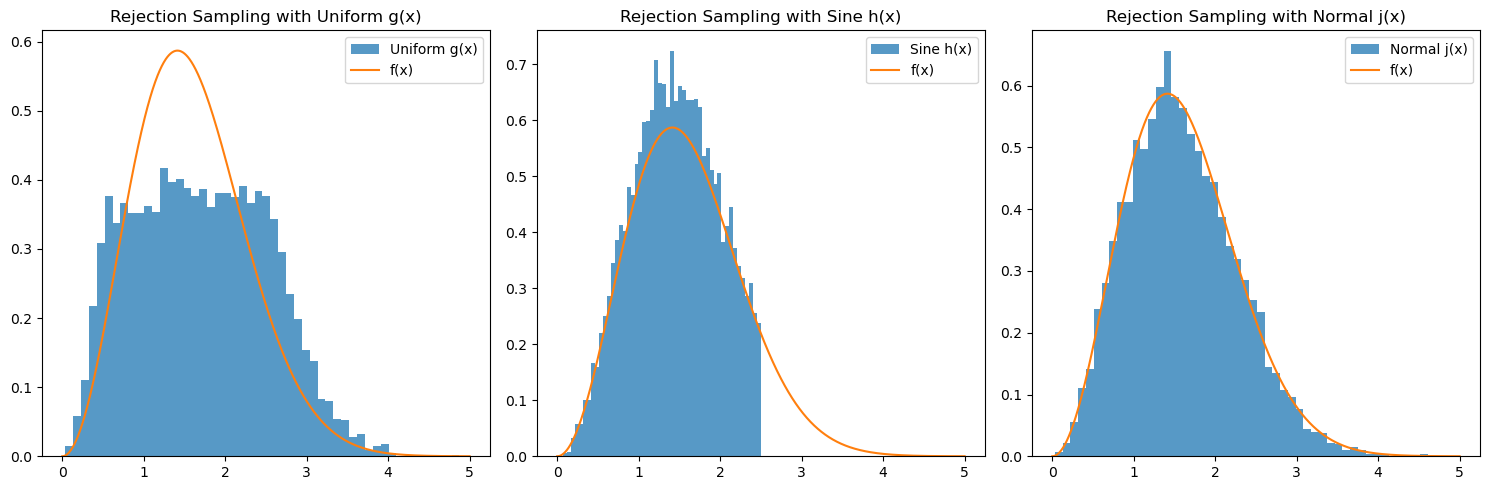

Efficiency (Uniform g(x)): 0.0001
Efficiency (Sine h(x)): 0.0001
Efficiency (Normal j(x)): 0.0001


In [68]:
#Question 10

def f(x):
    return np.sqrt(2/np.pi) * x**2 * np.exp(-(x**2)/2)

# a): Rejection sampling with g(x) = 0.2
def rejection_sampling_uniform(num_samples=10000):
    samples = []
    while len(samples) < num_samples:
        x = np.random.uniform(0, 5)
        u = np.random.uniform(0, 1)
        if u < f(x) / 0.2:
            samples.append(x)
    return samples

# b): Rejection sampling with h(x) = (π/10)sin(π(x/5))
def h(x):
    return (np.pi/10) * np.sin(np.pi * x / 5)


def scaling_factor():
    ratio = lambda x: f(x) / h(x)
    result = minimize_scalar(lambda x: -ratio(x), bounds=(0, 4.999), method='bounded')
    return -result.fun

M = scaling_factor()

def H(x):
    return 1 - np.cos(np.pi * x / 5)

def H_inv(y):
    return 5 * np.arccos(1 - y) / np.pi

def rejection_sampling_sine(num_samples=10000):
    samples = []
    while len(samples) < num_samples:
        y = np.random.uniform(0, 1)
        x = H_inv(y)
        u = np.random.uniform(0, 1)
        if u < f(x) / (M * h(x)):
            samples.append(x)
    return samples

# c): Rejection sampling with normal distribution j(x)
mu = np.sqrt(2)
sigma = 2**(-1/4)

def rejection_sampling_normal(num_samples=10000):
    samples = []
    max_ratio = f(np.sqrt(2)) / norm.pdf(np.sqrt(2), mu, sigma)
    while len(samples) < num_samples:
        u1, u2 = np.random.uniform(0, 1, 2)
        z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
        z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
        x1 = mu + sigma * z1
        x2 = mu + sigma * z2
        if 0 < x1 < 5 and np.random.uniform(0, 1) < f(x1) / (max_ratio * norm.pdf(x1, mu, sigma)):
            samples.append(x1)
        if len(samples) < num_samples and 0 < x2 < 5 and np.random.uniform(0, 1) < f(x2) / (max_ratio * norm.pdf(x2, mu, sigma)):
            samples.append(x2)
    return samples

num_samples = 10000
samples_uniform = rejection_sampling_uniform(num_samples)
samples_sine = rejection_sampling_sine(num_samples)
samples_normal = rejection_sampling_normal(num_samples)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(samples_uniform, bins=50, density=True, alpha=0.75, label='Uniform g(x)')
x_vals = np.linspace(0, 5, 1000)
plt.plot(x_vals, f(x_vals), label='f(x)')
plt.title('Rejection Sampling with Uniform g(x)')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(samples_sine, bins=50, density=True, alpha=0.75, label='Sine h(x)')
plt.plot(x_vals, f(x_vals), label='f(x)')
plt.title('Rejection Sampling with Sine h(x)')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(samples_normal, bins=50, density=True, alpha=0.75, label='Normal j(x)')
plt.plot(x_vals, f(x_vals), label='f(x)')
plt.title('Rejection Sampling with Normal j(x)')
plt.legend()

plt.tight_layout()
plt.show()

# Comparing efficiency
def efficiency(method_func, num_samples=10000):
    iterations = 0
    samples = []
    while len(samples) < num_samples:
        samples.extend(method_func(num_samples))
        iterations += 1
    return iterations / num_samples

efficiency_uniform = efficiency(rejection_sampling_uniform)
efficiency_sine = efficiency(rejection_sampling_sine)
efficiency_normal = efficiency(rejection_sampling_normal)

print(f'Efficiency (Uniform g(x)): {efficiency_uniform}')
print(f'Efficiency (Sine h(x)): {efficiency_sine}')
print(f'Efficiency (Normal j(x)): {efficiency_normal}')